In [1]:
from gameagent import Agent
import gym
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [6]:
env = gym.make("MountainCarContinuous-v0")
agent = Agent(2,1,train_batch_size = 640)

In [10]:
epsilon = 0.999
epsilon_decaying = 0.99995
def run_episode(train = True, render = False, train_batch_size = 640,verbose = False):
    global epsilon
    global epsilon_decaying
    epsilon *= epsilon_decaying
    record = []
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)
        if np.random.random() < epsilon:
            action = np.clip(agent.get_action(state) + (np.random.normal()*epsilon),-1,1)
        else:
            action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        agent.memory.add(state,action,reward,next_frame.reshape(1,-1),done)
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)
    if train:
        print('trained_start')
        agent.train()
        print('trained_well')
    print("ep_reward:", ep_reward)

    episode_reward_lst.append(ep_reward)


In [11]:
episode_reward_lst = []

In [19]:
agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")

In [20]:
def run_training(iteration,save_point):
    for iterate in range(1,iteration+1):
        print('iterate : ',iterate)
        if iterate % 5 == 0:
            run_episode(train = True, render = False, train_batch_size=640,verbose=False)
        else:
            run_episode(train = False, render = False, train_batch_size=640,verbose=False)
        if iterate % save_point == 0:
            agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
            agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
            agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
            agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")

iterate :  1
ep_reward: -610.0
iterate :  2
ep_reward: -999.0
iterate :  3
ep_reward: -999.0
iterate :  4
ep_reward: -621.0
iterate :  5
trained_start
trained_well
ep_reward: -724.0
iterate :  6
ep_reward: -772.0
iterate :  7
ep_reward: -999.0
iterate :  8
ep_reward: -999.0
iterate :  9
ep_reward: -999.0
iterate :  10
trained_start
trained_well
ep_reward: -764.0
iterate :  11
ep_reward: -999.0
iterate :  12
ep_reward: -540.0
iterate :  13
ep_reward: -999.0
iterate :  14
ep_reward: -623.0
iterate :  15
trained_start
trained_well
ep_reward: -999.0
iterate :  16
ep_reward: -653.0
iterate :  17
ep_reward: -602.0
iterate :  18
ep_reward: -999.0
iterate :  19
ep_reward: -999.0
iterate :  20
trained_start
trained_well
ep_reward: -979.0
iterate :  21
ep_reward: -578.0
iterate :  22
ep_reward: -965.0
iterate :  23
ep_reward: -999.0
iterate :  24
ep_reward: -999.0
iterate :  25
trained_start
trained_well
ep_reward: -454.0
iterate :  26
ep_reward: -780.0
iterate :  27
ep_reward: -999.0
iterate : 

ep_reward: -999.0
iterate :  218
ep_reward: -462.0
iterate :  219
ep_reward: -999.0
iterate :  220
trained_start
trained_well
ep_reward: -999.0
iterate :  221
ep_reward: -999.0
iterate :  222
ep_reward: -999.0
iterate :  223
ep_reward: -785.0
iterate :  224
ep_reward: -999.0
iterate :  225
trained_start
trained_well
ep_reward: -394.0
iterate :  226
ep_reward: -999.0
iterate :  227
ep_reward: -697.0
iterate :  228
ep_reward: -999.0
iterate :  229
ep_reward: -999.0
iterate :  230
trained_start
trained_well
ep_reward: -544.0
iterate :  231
ep_reward: -707.0
iterate :  232
ep_reward: -999.0
iterate :  233
ep_reward: -730.0
iterate :  234
ep_reward: -999.0
iterate :  235
trained_start
trained_well
ep_reward: -999.0
iterate :  236
ep_reward: -999.0
iterate :  237
ep_reward: -999.0
iterate :  238
ep_reward: -999.0
iterate :  239
ep_reward: -999.0
iterate :  240
trained_start
trained_well
ep_reward: -557.0
iterate :  241
ep_reward: -999.0
iterate :  242
ep_reward: -641.0
iterate :  243
ep_rewa

ep_reward: -999.0
iterate :  432
ep_reward: -999.0
iterate :  433
ep_reward: -678.0
iterate :  434
ep_reward: -999.0
iterate :  435
trained_start
trained_well
ep_reward: -999.0
iterate :  436
ep_reward: -999.0
iterate :  437
ep_reward: -823.0
iterate :  438
ep_reward: -999.0
iterate :  439
ep_reward: -971.0
iterate :  440
trained_start
trained_well
ep_reward: -569.0
iterate :  441
ep_reward: -552.0
iterate :  442
ep_reward: -530.0
iterate :  443
ep_reward: -999.0
iterate :  444
ep_reward: -901.0
iterate :  445
trained_start
trained_well
ep_reward: -924.0
iterate :  446
ep_reward: -999.0
iterate :  447
ep_reward: -999.0
iterate :  448
ep_reward: -586.0
iterate :  449
ep_reward: -940.0
iterate :  450
trained_start
trained_well
ep_reward: -999.0
iterate :  451
ep_reward: -999.0
iterate :  452
ep_reward: -999.0
iterate :  453
ep_reward: -999.0
iterate :  454
ep_reward: -723.0
iterate :  455
trained_start
trained_well
ep_reward: -999.0
iterate :  456
ep_reward: -816.0
iterate :  457
ep_rewa

trained_start
trained_well
ep_reward: -737.0
iterate :  646
ep_reward: -999.0
iterate :  647
ep_reward: -999.0
iterate :  648
ep_reward: -999.0
iterate :  649
ep_reward: -999.0
iterate :  650
trained_start
trained_well
ep_reward: -783.0
iterate :  651
ep_reward: -397.0
iterate :  652
ep_reward: -627.0
iterate :  653
ep_reward: -713.0
iterate :  654
ep_reward: -999.0
iterate :  655
trained_start
trained_well
ep_reward: -999.0
iterate :  656
ep_reward: -656.0
iterate :  657
ep_reward: -999.0
iterate :  658
ep_reward: -999.0
iterate :  659
ep_reward: -999.0
iterate :  660
trained_start
trained_well
ep_reward: -999.0
iterate :  661
ep_reward: -702.0
iterate :  662
ep_reward: -999.0
iterate :  663
ep_reward: -999.0
iterate :  664
ep_reward: -879.0
iterate :  665
trained_start
trained_well
ep_reward: -865.0
iterate :  666
ep_reward: -999.0
iterate :  667
ep_reward: -999.0
iterate :  668
ep_reward: -999.0
iterate :  669
ep_reward: -474.0
iterate :  670
trained_start
trained_well
ep_reward: -9

ep_reward: -782.0
iterate :  860
trained_start
trained_well
ep_reward: -999.0
iterate :  861
ep_reward: -999.0
iterate :  862
ep_reward: -844.0
iterate :  863
ep_reward: -999.0
iterate :  864
ep_reward: -999.0
iterate :  865
trained_start
trained_well
ep_reward: -999.0
iterate :  866
ep_reward: -999.0
iterate :  867
ep_reward: -999.0
iterate :  868
ep_reward: -999.0
iterate :  869
ep_reward: -999.0
iterate :  870
trained_start
trained_well
ep_reward: -999.0
iterate :  871
ep_reward: -999.0
iterate :  872
ep_reward: -999.0
iterate :  873
ep_reward: -999.0
iterate :  874
ep_reward: -999.0
iterate :  875
trained_start
trained_well
ep_reward: -999.0
iterate :  876
ep_reward: -558.0
iterate :  877
ep_reward: -999.0
iterate :  878
ep_reward: -999.0
iterate :  879
ep_reward: -999.0
iterate :  880
trained_start
trained_well
ep_reward: -863.0
iterate :  881
ep_reward: -999.0
iterate :  882
ep_reward: -658.0
iterate :  883
ep_reward: -999.0
iterate :  884
ep_reward: -999.0
iterate :  885
trained

ep_reward: -999.0
iterate :  1072
ep_reward: -999.0
iterate :  1073
ep_reward: -950.0
iterate :  1074
ep_reward: -999.0
iterate :  1075
trained_start
trained_well
ep_reward: -999.0
iterate :  1076
ep_reward: -999.0
iterate :  1077
ep_reward: -999.0
iterate :  1078
ep_reward: -999.0
iterate :  1079
ep_reward: -999.0
iterate :  1080
trained_start
trained_well
ep_reward: -942.0
iterate :  1081
ep_reward: -999.0
iterate :  1082
ep_reward: -999.0
iterate :  1083
ep_reward: -589.0
iterate :  1084
ep_reward: -892.0
iterate :  1085
trained_start
trained_well
ep_reward: -557.0
iterate :  1086
ep_reward: -999.0
iterate :  1087
ep_reward: -999.0
iterate :  1088
ep_reward: -999.0
iterate :  1089
ep_reward: -999.0
iterate :  1090
trained_start
trained_well
ep_reward: -755.0
iterate :  1091
ep_reward: -999.0
iterate :  1092
ep_reward: -591.0
iterate :  1093
ep_reward: -999.0
iterate :  1094
ep_reward: -917.0
iterate :  1095
trained_start
trained_well
ep_reward: -999.0
iterate :  1096
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  1281
ep_reward: -999.0
iterate :  1282
ep_reward: -999.0
iterate :  1283
ep_reward: -999.0
iterate :  1284
ep_reward: -999.0
iterate :  1285
trained_start
trained_well
ep_reward: -999.0
iterate :  1286
ep_reward: -999.0
iterate :  1287
ep_reward: -999.0
iterate :  1288
ep_reward: -999.0
iterate :  1289
ep_reward: -383.0
iterate :  1290
trained_start
trained_well
ep_reward: -999.0
iterate :  1291
ep_reward: -999.0
iterate :  1292
ep_reward: -999.0
iterate :  1293
ep_reward: -999.0
iterate :  1294
ep_reward: -999.0
iterate :  1295
trained_start
trained_well
ep_reward: -999.0
iterate :  1296
ep_reward: -999.0
iterate :  1297
ep_reward: -999.0
iterate :  1298
ep_reward: -999.0
iterate :  1299
ep_reward: -999.0
iterate :  1300
trained_start
trained_well
ep_reward: -999.0
iterate :  1301
ep_reward: -999.0
iterate :  1302
ep_reward: -999.0
iterate :  1303
ep_reward: -999.0
iterate :  1304
ep_reward: -999.0
iterate :  1305
trained_start
t

ep_reward: -990.0
iterate :  1489
ep_reward: -605.0
iterate :  1490
trained_start
trained_well
ep_reward: -999.0
iterate :  1491
ep_reward: -983.0
iterate :  1492
ep_reward: -657.0
iterate :  1493
ep_reward: -999.0
iterate :  1494
ep_reward: -999.0
iterate :  1495
trained_start
trained_well
ep_reward: -999.0
iterate :  1496
ep_reward: -388.0
iterate :  1497
ep_reward: -999.0
iterate :  1498
ep_reward: -639.0
iterate :  1499
ep_reward: -999.0
iterate :  1500
trained_start
trained_well
ep_reward: -999.0
iterate :  1501
ep_reward: -671.0
iterate :  1502
ep_reward: -999.0
iterate :  1503
ep_reward: -999.0
iterate :  1504
ep_reward: -999.0
iterate :  1505
trained_start
trained_well
ep_reward: -999.0
iterate :  1506
ep_reward: -999.0
iterate :  1507
ep_reward: -910.0
iterate :  1508
ep_reward: -999.0
iterate :  1509
ep_reward: -999.0
iterate :  1510
trained_start
trained_well
ep_reward: -999.0
iterate :  1511
ep_reward: -609.0
iterate :  1512
ep_reward: -920.0
iterate :  1513
ep_reward: -999

ep_reward: -999.0
iterate :  1697
ep_reward: -999.0
iterate :  1698
ep_reward: -999.0
iterate :  1699
ep_reward: -999.0
iterate :  1700
trained_start
trained_well
ep_reward: -999.0
iterate :  1701
ep_reward: -999.0
iterate :  1702
ep_reward: -948.0
iterate :  1703
ep_reward: -999.0
iterate :  1704
ep_reward: -999.0
iterate :  1705
trained_start
trained_well
ep_reward: -999.0
iterate :  1706
ep_reward: -999.0
iterate :  1707
ep_reward: -999.0
iterate :  1708
ep_reward: -999.0
iterate :  1709
ep_reward: -999.0
iterate :  1710
trained_start
trained_well
ep_reward: -999.0
iterate :  1711
ep_reward: -999.0
iterate :  1712
ep_reward: -999.0
iterate :  1713
ep_reward: -999.0
iterate :  1714
ep_reward: -999.0
iterate :  1715
trained_start
trained_well
ep_reward: -999.0
iterate :  1716
ep_reward: -999.0
iterate :  1717
ep_reward: -999.0
iterate :  1718
ep_reward: -999.0
iterate :  1719
ep_reward: -999.0
iterate :  1720
trained_start
trained_well
ep_reward: -999.0
iterate :  1721
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  1906
ep_reward: -999.0
iterate :  1907
ep_reward: -999.0
iterate :  1908
ep_reward: -999.0
iterate :  1909
ep_reward: -999.0
iterate :  1910
trained_start
trained_well
ep_reward: -999.0
iterate :  1911
ep_reward: -999.0
iterate :  1912
ep_reward: -999.0
iterate :  1913
ep_reward: -999.0
iterate :  1914
ep_reward: -999.0
iterate :  1915
trained_start
trained_well
ep_reward: -999.0
iterate :  1916
ep_reward: -999.0
iterate :  1917
ep_reward: -999.0
iterate :  1918
ep_reward: -999.0
iterate :  1919
ep_reward: -834.0
iterate :  1920
trained_start
trained_well
ep_reward: -999.0
iterate :  1921
ep_reward: -999.0
iterate :  1922
ep_reward: -999.0
iterate :  1923
ep_reward: -999.0
iterate :  1924
ep_reward: -999.0
iterate :  1925
trained_start
trained_well
ep_reward: -999.0
iterate :  1926
ep_reward: -999.0
iterate :  1927
ep_reward: -999.0
iterate :  1928
ep_reward: -999.0
iterate :  1929
ep_reward: -999.0
iterate :  1930
trained_start
t

ep_reward: -999.0
iterate :  2114
ep_reward: -999.0
iterate :  2115
trained_start
trained_well
ep_reward: -999.0
iterate :  2116
ep_reward: -966.0
iterate :  2117
ep_reward: -999.0
iterate :  2118
ep_reward: -999.0
iterate :  2119
ep_reward: -999.0
iterate :  2120
trained_start
trained_well
ep_reward: -804.0
iterate :  2121
ep_reward: -999.0
iterate :  2122
ep_reward: -999.0
iterate :  2123
ep_reward: -729.0
iterate :  2124
ep_reward: -829.0
iterate :  2125
trained_start
trained_well
ep_reward: -999.0
iterate :  2126
ep_reward: -999.0
iterate :  2127
ep_reward: -999.0
iterate :  2128
ep_reward: -999.0
iterate :  2129
ep_reward: -999.0
iterate :  2130
trained_start
trained_well
ep_reward: -999.0
iterate :  2131
ep_reward: -999.0
iterate :  2132
ep_reward: -999.0
iterate :  2133
ep_reward: -999.0
iterate :  2134
ep_reward: -999.0
iterate :  2135
trained_start
trained_well
ep_reward: -999.0
iterate :  2136
ep_reward: -999.0
iterate :  2137
ep_reward: -999.0
iterate :  2138
ep_reward: -999

ep_reward: -976.0
iterate :  2322
ep_reward: -999.0
iterate :  2323
ep_reward: -999.0
iterate :  2324
ep_reward: -999.0
iterate :  2325
trained_start
trained_well
ep_reward: -999.0
iterate :  2326
ep_reward: -999.0
iterate :  2327
ep_reward: -999.0
iterate :  2328
ep_reward: -999.0
iterate :  2329
ep_reward: -999.0
iterate :  2330
trained_start
trained_well
ep_reward: -999.0
iterate :  2331
ep_reward: -644.0
iterate :  2332
ep_reward: -999.0
iterate :  2333
ep_reward: -999.0
iterate :  2334
ep_reward: -999.0
iterate :  2335
trained_start
trained_well
ep_reward: -999.0
iterate :  2336
ep_reward: -999.0
iterate :  2337
ep_reward: -999.0
iterate :  2338
ep_reward: -999.0
iterate :  2339
ep_reward: -999.0
iterate :  2340
trained_start
trained_well
ep_reward: -999.0
iterate :  2341
ep_reward: -999.0
iterate :  2342
ep_reward: -999.0
iterate :  2343
ep_reward: -999.0
iterate :  2344
ep_reward: -861.0
iterate :  2345
trained_start
trained_well
ep_reward: -999.0
iterate :  2346
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  2531
ep_reward: -999.0
iterate :  2532
ep_reward: -487.0
iterate :  2533
ep_reward: -999.0
iterate :  2534
ep_reward: -999.0
iterate :  2535
trained_start
trained_well
ep_reward: -999.0
iterate :  2536
ep_reward: -999.0
iterate :  2537
ep_reward: -538.0
iterate :  2538
ep_reward: -999.0
iterate :  2539
ep_reward: -999.0
iterate :  2540
trained_start
trained_well
ep_reward: -999.0
iterate :  2541
ep_reward: -999.0
iterate :  2542
ep_reward: -999.0
iterate :  2543
ep_reward: -999.0
iterate :  2544
ep_reward: -999.0
iterate :  2545
trained_start
trained_well
ep_reward: -999.0
iterate :  2546
ep_reward: -999.0
iterate :  2547
ep_reward: -583.0
iterate :  2548
ep_reward: -999.0
iterate :  2549
ep_reward: -999.0
iterate :  2550
trained_start
trained_well
ep_reward: -999.0
iterate :  2551
ep_reward: -963.0
iterate :  2552
ep_reward: -999.0
iterate :  2553
ep_reward: -999.0
iterate :  2554
ep_reward: -999.0
iterate :  2555
trained_start
t

ep_reward: -999.0
iterate :  2739
ep_reward: -999.0
iterate :  2740
trained_start
trained_well
ep_reward: -999.0
iterate :  2741
ep_reward: -999.0
iterate :  2742
ep_reward: -999.0
iterate :  2743
ep_reward: -999.0
iterate :  2744
ep_reward: -999.0
iterate :  2745
trained_start
trained_well
ep_reward: -999.0
iterate :  2746
ep_reward: -999.0
iterate :  2747
ep_reward: -999.0
iterate :  2748
ep_reward: -999.0
iterate :  2749
ep_reward: -999.0
iterate :  2750
trained_start
trained_well
ep_reward: -999.0
iterate :  2751
ep_reward: -999.0
iterate :  2752
ep_reward: -466.0
iterate :  2753
ep_reward: -999.0
iterate :  2754
ep_reward: -999.0
iterate :  2755
trained_start
trained_well
ep_reward: -999.0
iterate :  2756
ep_reward: -727.0
iterate :  2757
ep_reward: -492.0
iterate :  2758
ep_reward: -999.0
iterate :  2759
ep_reward: -999.0
iterate :  2760
trained_start
trained_well
ep_reward: -999.0
iterate :  2761
ep_reward: -999.0
iterate :  2762
ep_reward: -999.0
iterate :  2763
ep_reward: -999

ep_reward: -939.0
iterate :  2947
ep_reward: -999.0
iterate :  2948
ep_reward: -665.0
iterate :  2949
ep_reward: -999.0
iterate :  2950
trained_start
trained_well
ep_reward: -999.0
iterate :  2951
ep_reward: -999.0
iterate :  2952
ep_reward: -999.0
iterate :  2953
ep_reward: -999.0
iterate :  2954
ep_reward: -999.0
iterate :  2955
trained_start
trained_well
ep_reward: -999.0
iterate :  2956
ep_reward: -683.0
iterate :  2957
ep_reward: -999.0
iterate :  2958
ep_reward: -999.0
iterate :  2959
ep_reward: -999.0
iterate :  2960
trained_start
trained_well
ep_reward: -999.0
iterate :  2961
ep_reward: -999.0
iterate :  2962
ep_reward: -999.0
iterate :  2963
ep_reward: -999.0
iterate :  2964
ep_reward: -999.0
iterate :  2965
trained_start
trained_well
ep_reward: -999.0
iterate :  2966
ep_reward: -999.0
iterate :  2967
ep_reward: -999.0
iterate :  2968
ep_reward: -719.0
iterate :  2969
ep_reward: -999.0
iterate :  2970
trained_start
trained_well
ep_reward: -999.0
iterate :  2971
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  3156
ep_reward: -999.0
iterate :  3157
ep_reward: -999.0
iterate :  3158
ep_reward: -999.0
iterate :  3159
ep_reward: -999.0
iterate :  3160
trained_start
trained_well
ep_reward: -999.0
iterate :  3161
ep_reward: -902.0
iterate :  3162
ep_reward: -999.0
iterate :  3163
ep_reward: -999.0
iterate :  3164
ep_reward: -999.0
iterate :  3165
trained_start
trained_well
ep_reward: -999.0
iterate :  3166
ep_reward: -999.0
iterate :  3167
ep_reward: -999.0
iterate :  3168
ep_reward: -999.0
iterate :  3169
ep_reward: -999.0
iterate :  3170
trained_start
trained_well
ep_reward: -556.0
iterate :  3171
ep_reward: -999.0
iterate :  3172
ep_reward: -999.0
iterate :  3173
ep_reward: -999.0
iterate :  3174
ep_reward: -999.0
iterate :  3175
trained_start
trained_well
ep_reward: -577.0
iterate :  3176
ep_reward: -999.0
iterate :  3177
ep_reward: -999.0
iterate :  3178
ep_reward: -999.0
iterate :  3179
ep_reward: -999.0
iterate :  3180
trained_start
t

ep_reward: -999.0
iterate :  3364
ep_reward: -999.0
iterate :  3365
trained_start
trained_well
ep_reward: -941.0
iterate :  3366
ep_reward: -999.0
iterate :  3367
ep_reward: -999.0
iterate :  3368
ep_reward: -999.0
iterate :  3369
ep_reward: -999.0
iterate :  3370
trained_start
trained_well
ep_reward: -999.0
iterate :  3371
ep_reward: -999.0
iterate :  3372
ep_reward: -999.0
iterate :  3373
ep_reward: -999.0
iterate :  3374
ep_reward: -999.0
iterate :  3375
trained_start
trained_well
ep_reward: -999.0
iterate :  3376
ep_reward: -999.0
iterate :  3377
ep_reward: -999.0
iterate :  3378
ep_reward: -999.0
iterate :  3379
ep_reward: -999.0
iterate :  3380
trained_start
trained_well
ep_reward: -999.0
iterate :  3381
ep_reward: -572.0
iterate :  3382
ep_reward: -999.0
iterate :  3383
ep_reward: -691.0
iterate :  3384
ep_reward: -999.0
iterate :  3385
trained_start
trained_well
ep_reward: -996.0
iterate :  3386
ep_reward: -999.0
iterate :  3387
ep_reward: -999.0
iterate :  3388
ep_reward: -999

ep_reward: -999.0
iterate :  3572
ep_reward: -565.0
iterate :  3573
ep_reward: -999.0
iterate :  3574
ep_reward: -999.0
iterate :  3575
trained_start
trained_well
ep_reward: -999.0
iterate :  3576
ep_reward: -763.0
iterate :  3577
ep_reward: -999.0
iterate :  3578
ep_reward: -939.0
iterate :  3579
ep_reward: -999.0
iterate :  3580
trained_start
trained_well
ep_reward: -999.0
iterate :  3581
ep_reward: -999.0
iterate :  3582
ep_reward: -999.0
iterate :  3583
ep_reward: -940.0
iterate :  3584
ep_reward: -817.0
iterate :  3585
trained_start
trained_well
ep_reward: -999.0
iterate :  3586
ep_reward: -999.0
iterate :  3587
ep_reward: -885.0
iterate :  3588
ep_reward: -999.0
iterate :  3589
ep_reward: -999.0
iterate :  3590
trained_start
trained_well
ep_reward: -999.0
iterate :  3591
ep_reward: -999.0
iterate :  3592
ep_reward: -999.0
iterate :  3593
ep_reward: -999.0
iterate :  3594
ep_reward: -999.0
iterate :  3595
trained_start
trained_well
ep_reward: -999.0
iterate :  3596
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  3781
ep_reward: -999.0
iterate :  3782
ep_reward: -999.0
iterate :  3783
ep_reward: -999.0
iterate :  3784
ep_reward: -999.0
iterate :  3785
trained_start
trained_well
ep_reward: -999.0
iterate :  3786
ep_reward: -999.0
iterate :  3787
ep_reward: -967.0
iterate :  3788
ep_reward: -999.0
iterate :  3789
ep_reward: -999.0
iterate :  3790
trained_start
trained_well
ep_reward: -999.0
iterate :  3791
ep_reward: -999.0
iterate :  3792
ep_reward: -999.0
iterate :  3793
ep_reward: -999.0
iterate :  3794
ep_reward: -999.0
iterate :  3795
trained_start
trained_well
ep_reward: -823.0
iterate :  3796
ep_reward: -999.0
iterate :  3797
ep_reward: -999.0
iterate :  3798
ep_reward: -999.0
iterate :  3799
ep_reward: -999.0
iterate :  3800
trained_start
trained_well
ep_reward: -667.0
iterate :  3801
ep_reward: -999.0
iterate :  3802
ep_reward: -999.0
iterate :  3803
ep_reward: -999.0
iterate :  3804
ep_reward: -999.0
iterate :  3805
trained_start
t

ep_reward: -999.0
iterate :  3989
ep_reward: -999.0
iterate :  3990
trained_start
trained_well
ep_reward: -669.0
iterate :  3991
ep_reward: -999.0
iterate :  3992
ep_reward: -787.0
iterate :  3993
ep_reward: -999.0
iterate :  3994
ep_reward: -999.0
iterate :  3995
trained_start
trained_well
ep_reward: -999.0
iterate :  3996
ep_reward: -999.0
iterate :  3997
ep_reward: -999.0
iterate :  3998
ep_reward: -999.0
iterate :  3999
ep_reward: -999.0
iterate :  4000
trained_start
trained_well
ep_reward: -322.0
iterate :  4001
ep_reward: -999.0
iterate :  4002
ep_reward: -816.0
iterate :  4003
ep_reward: -999.0
iterate :  4004
ep_reward: -999.0
iterate :  4005
trained_start
trained_well
ep_reward: -999.0
iterate :  4006
ep_reward: -999.0
iterate :  4007
ep_reward: -827.0
iterate :  4008
ep_reward: -999.0
iterate :  4009
ep_reward: -999.0
iterate :  4010
trained_start
trained_well
ep_reward: -999.0
iterate :  4011
ep_reward: -999.0
iterate :  4012
ep_reward: -917.0
iterate :  4013
ep_reward: -999

ep_reward: -999.0
iterate :  4197
ep_reward: -999.0
iterate :  4198
ep_reward: -999.0
iterate :  4199
ep_reward: -999.0
iterate :  4200
trained_start
trained_well
ep_reward: -999.0
iterate :  4201
ep_reward: -999.0
iterate :  4202
ep_reward: -999.0
iterate :  4203
ep_reward: -999.0
iterate :  4204
ep_reward: -999.0
iterate :  4205
trained_start
trained_well
ep_reward: -999.0
iterate :  4206
ep_reward: -999.0
iterate :  4207
ep_reward: -999.0
iterate :  4208
ep_reward: -999.0
iterate :  4209
ep_reward: -999.0
iterate :  4210
trained_start
trained_well
ep_reward: -999.0
iterate :  4211
ep_reward: -872.0
iterate :  4212
ep_reward: -999.0
iterate :  4213
ep_reward: -999.0
iterate :  4214
ep_reward: -999.0
iterate :  4215
trained_start
trained_well
ep_reward: -999.0
iterate :  4216
ep_reward: -999.0
iterate :  4217
ep_reward: -999.0
iterate :  4218
ep_reward: -999.0
iterate :  4219
ep_reward: -999.0
iterate :  4220
trained_start
trained_well
ep_reward: -999.0
iterate :  4221
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  4406
ep_reward: -999.0
iterate :  4407
ep_reward: -999.0
iterate :  4408
ep_reward: -999.0
iterate :  4409
ep_reward: -999.0
iterate :  4410
trained_start
trained_well
ep_reward: -999.0
iterate :  4411
ep_reward: -999.0
iterate :  4412
ep_reward: -999.0
iterate :  4413
ep_reward: -999.0
iterate :  4414
ep_reward: -999.0
iterate :  4415
trained_start
trained_well
ep_reward: -999.0
iterate :  4416
ep_reward: -999.0
iterate :  4417
ep_reward: -999.0
iterate :  4418
ep_reward: -999.0
iterate :  4419
ep_reward: -999.0
iterate :  4420
trained_start
trained_well
ep_reward: -898.0
iterate :  4421
ep_reward: -999.0
iterate :  4422
ep_reward: -999.0
iterate :  4423
ep_reward: -999.0
iterate :  4424
ep_reward: -999.0
iterate :  4425
trained_start
trained_well
ep_reward: -999.0
iterate :  4426
ep_reward: -999.0
iterate :  4427
ep_reward: -999.0
iterate :  4428
ep_reward: -999.0
iterate :  4429
ep_reward: -999.0
iterate :  4430
trained_start
t

ep_reward: -999.0
iterate :  4614
ep_reward: -999.0
iterate :  4615
trained_start
trained_well
ep_reward: -999.0
iterate :  4616
ep_reward: -958.0
iterate :  4617
ep_reward: -999.0
iterate :  4618
ep_reward: -999.0
iterate :  4619
ep_reward: -999.0
iterate :  4620
trained_start
trained_well
ep_reward: -999.0
iterate :  4621
ep_reward: -808.0
iterate :  4622
ep_reward: -999.0
iterate :  4623
ep_reward: -999.0
iterate :  4624
ep_reward: -999.0
iterate :  4625
trained_start
trained_well
ep_reward: -999.0
iterate :  4626
ep_reward: -999.0
iterate :  4627
ep_reward: -999.0
iterate :  4628
ep_reward: -999.0
iterate :  4629
ep_reward: -999.0
iterate :  4630
trained_start
trained_well
ep_reward: -999.0
iterate :  4631
ep_reward: -999.0
iterate :  4632
ep_reward: -475.0
iterate :  4633
ep_reward: -999.0
iterate :  4634
ep_reward: -999.0
iterate :  4635
trained_start
trained_well
ep_reward: -999.0
iterate :  4636
ep_reward: -999.0
iterate :  4637
ep_reward: -999.0
iterate :  4638
ep_reward: -999

ep_reward: -999.0
iterate :  4822
ep_reward: -999.0
iterate :  4823
ep_reward: -999.0
iterate :  4824
ep_reward: -999.0
iterate :  4825
trained_start
trained_well
ep_reward: -999.0
iterate :  4826
ep_reward: -999.0
iterate :  4827
ep_reward: -911.0
iterate :  4828
ep_reward: -999.0
iterate :  4829
ep_reward: -999.0
iterate :  4830
trained_start
trained_well
ep_reward: -999.0
iterate :  4831
ep_reward: -999.0
iterate :  4832
ep_reward: -999.0
iterate :  4833
ep_reward: -999.0
iterate :  4834
ep_reward: -999.0
iterate :  4835
trained_start
trained_well
ep_reward: -999.0
iterate :  4836
ep_reward: -999.0
iterate :  4837
ep_reward: -999.0
iterate :  4838
ep_reward: -999.0
iterate :  4839
ep_reward: -999.0
iterate :  4840
trained_start
trained_well
ep_reward: -999.0
iterate :  4841
ep_reward: -999.0
iterate :  4842
ep_reward: -999.0
iterate :  4843
ep_reward: -999.0
iterate :  4844
ep_reward: -999.0
iterate :  4845
trained_start
trained_well
ep_reward: -999.0
iterate :  4846
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  5031
ep_reward: -999.0
iterate :  5032
ep_reward: -999.0
iterate :  5033
ep_reward: -999.0
iterate :  5034
ep_reward: -999.0
iterate :  5035
trained_start
trained_well
ep_reward: -999.0
iterate :  5036
ep_reward: -999.0
iterate :  5037
ep_reward: -999.0
iterate :  5038
ep_reward: -999.0
iterate :  5039
ep_reward: -999.0
iterate :  5040
trained_start
trained_well
ep_reward: -999.0
iterate :  5041
ep_reward: -999.0
iterate :  5042
ep_reward: -999.0
iterate :  5043
ep_reward: -999.0
iterate :  5044
ep_reward: -749.0
iterate :  5045
trained_start
trained_well
ep_reward: -999.0
iterate :  5046
ep_reward: -999.0
iterate :  5047
ep_reward: -999.0
iterate :  5048
ep_reward: -999.0
iterate :  5049
ep_reward: -999.0
iterate :  5050
trained_start
trained_well
ep_reward: -999.0
iterate :  5051
ep_reward: -999.0
iterate :  5052
ep_reward: -999.0
iterate :  5053
ep_reward: -999.0
iterate :  5054
ep_reward: -999.0
iterate :  5055
trained_start
t

ep_reward: -999.0
iterate :  5239
ep_reward: -999.0
iterate :  5240
trained_start
trained_well
ep_reward: -999.0
iterate :  5241
ep_reward: -999.0
iterate :  5242
ep_reward: -835.0
iterate :  5243
ep_reward: -999.0
iterate :  5244
ep_reward: -999.0
iterate :  5245
trained_start
trained_well
ep_reward: -999.0
iterate :  5246
ep_reward: -999.0
iterate :  5247
ep_reward: -999.0
iterate :  5248
ep_reward: -999.0
iterate :  5249
ep_reward: -898.0
iterate :  5250
trained_start
trained_well
ep_reward: -999.0
iterate :  5251
ep_reward: -999.0
iterate :  5252
ep_reward: -999.0
iterate :  5253
ep_reward: -999.0
iterate :  5254
ep_reward: -999.0
iterate :  5255
trained_start
trained_well
ep_reward: -999.0
iterate :  5256
ep_reward: -999.0
iterate :  5257
ep_reward: -999.0
iterate :  5258
ep_reward: -999.0
iterate :  5259
ep_reward: -999.0
iterate :  5260
trained_start
trained_well
ep_reward: -999.0
iterate :  5261
ep_reward: -999.0
iterate :  5262
ep_reward: -999.0
iterate :  5263
ep_reward: -999

ep_reward: -999.0
iterate :  5447
ep_reward: -999.0
iterate :  5448
ep_reward: -997.0
iterate :  5449
ep_reward: -505.0
iterate :  5450
trained_start
trained_well
ep_reward: -999.0
iterate :  5451
ep_reward: -999.0
iterate :  5452
ep_reward: -623.0
iterate :  5453
ep_reward: -999.0
iterate :  5454
ep_reward: -999.0
iterate :  5455
trained_start
trained_well
ep_reward: -999.0
iterate :  5456
ep_reward: -999.0
iterate :  5457
ep_reward: -999.0
iterate :  5458
ep_reward: -999.0
iterate :  5459
ep_reward: -999.0
iterate :  5460
trained_start
trained_well
ep_reward: -839.0
iterate :  5461
ep_reward: -999.0
iterate :  5462
ep_reward: -999.0
iterate :  5463
ep_reward: -999.0
iterate :  5464
ep_reward: -999.0
iterate :  5465
trained_start
trained_well
ep_reward: -691.0
iterate :  5466
ep_reward: -999.0
iterate :  5467
ep_reward: -999.0
iterate :  5468
ep_reward: -999.0
iterate :  5469
ep_reward: -999.0
iterate :  5470
trained_start
trained_well
ep_reward: -999.0
iterate :  5471
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  5656
ep_reward: -999.0
iterate :  5657
ep_reward: -999.0
iterate :  5658
ep_reward: -999.0
iterate :  5659
ep_reward: -999.0
iterate :  5660
trained_start
trained_well
ep_reward: -999.0
iterate :  5661
ep_reward: -999.0
iterate :  5662
ep_reward: -999.0
iterate :  5663
ep_reward: -999.0
iterate :  5664
ep_reward: -999.0
iterate :  5665
trained_start
trained_well
ep_reward: -999.0
iterate :  5666
ep_reward: -999.0
iterate :  5667
ep_reward: -999.0
iterate :  5668
ep_reward: -999.0
iterate :  5669
ep_reward: -364.0
iterate :  5670
trained_start
trained_well
ep_reward: -936.0
iterate :  5671
ep_reward: -999.0
iterate :  5672
ep_reward: -999.0
iterate :  5673
ep_reward: -999.0
iterate :  5674
ep_reward: -999.0
iterate :  5675
trained_start
trained_well
ep_reward: -999.0
iterate :  5676
ep_reward: -999.0
iterate :  5677
ep_reward: -999.0
iterate :  5678
ep_reward: -999.0
iterate :  5679
ep_reward: -999.0
iterate :  5680
trained_start
t

ep_reward: -999.0
iterate :  5864
ep_reward: -999.0
iterate :  5865
trained_start
trained_well
ep_reward: -999.0
iterate :  5866
ep_reward: -999.0
iterate :  5867
ep_reward: -999.0
iterate :  5868
ep_reward: -999.0
iterate :  5869
ep_reward: -771.0
iterate :  5870
trained_start
trained_well
ep_reward: -592.0
iterate :  5871
ep_reward: -999.0
iterate :  5872
ep_reward: -999.0
iterate :  5873
ep_reward: -999.0
iterate :  5874
ep_reward: -989.0
iterate :  5875
trained_start
trained_well
ep_reward: -999.0
iterate :  5876
ep_reward: -999.0
iterate :  5877
ep_reward: -999.0
iterate :  5878
ep_reward: -999.0
iterate :  5879
ep_reward: -999.0
iterate :  5880
trained_start
trained_well
ep_reward: -999.0
iterate :  5881
ep_reward: -999.0
iterate :  5882
ep_reward: -655.0
iterate :  5883
ep_reward: -999.0
iterate :  5884
ep_reward: -999.0
iterate :  5885
trained_start
trained_well
ep_reward: -999.0
iterate :  5886
ep_reward: -999.0
iterate :  5887
ep_reward: -999.0
iterate :  5888
ep_reward: -999

ep_reward: -999.0
iterate :  6072
ep_reward: -999.0
iterate :  6073
ep_reward: -999.0
iterate :  6074
ep_reward: -414.0
iterate :  6075
trained_start
trained_well
ep_reward: -999.0
iterate :  6076
ep_reward: -999.0
iterate :  6077
ep_reward: -999.0
iterate :  6078
ep_reward: -999.0
iterate :  6079
ep_reward: -999.0
iterate :  6080
trained_start
trained_well
ep_reward: -999.0
iterate :  6081
ep_reward: -999.0
iterate :  6082
ep_reward: -999.0
iterate :  6083
ep_reward: -999.0
iterate :  6084
ep_reward: -999.0
iterate :  6085
trained_start
trained_well
ep_reward: -739.0
iterate :  6086
ep_reward: -999.0
iterate :  6087
ep_reward: -999.0
iterate :  6088
ep_reward: -999.0
iterate :  6089
ep_reward: -999.0
iterate :  6090
trained_start
trained_well
ep_reward: -999.0
iterate :  6091
ep_reward: -999.0
iterate :  6092
ep_reward: -604.0
iterate :  6093
ep_reward: -999.0
iterate :  6094
ep_reward: -999.0
iterate :  6095
trained_start
trained_well
ep_reward: -999.0
iterate :  6096
ep_reward: -582

trained_start
trained_well
ep_reward: -999.0
iterate :  6281
ep_reward: -999.0
iterate :  6282
ep_reward: -999.0
iterate :  6283
ep_reward: -999.0
iterate :  6284
ep_reward: -999.0
iterate :  6285
trained_start
trained_well
ep_reward: -999.0
iterate :  6286
ep_reward: -999.0
iterate :  6287
ep_reward: -999.0
iterate :  6288
ep_reward: -999.0
iterate :  6289
ep_reward: -999.0
iterate :  6290
trained_start
trained_well
ep_reward: -999.0
iterate :  6291
ep_reward: -999.0
iterate :  6292
ep_reward: -999.0
iterate :  6293
ep_reward: -999.0
iterate :  6294
ep_reward: -999.0
iterate :  6295
trained_start
trained_well
ep_reward: -999.0
iterate :  6296
ep_reward: -999.0
iterate :  6297
ep_reward: -999.0
iterate :  6298
ep_reward: -999.0
iterate :  6299
ep_reward: -999.0
iterate :  6300
trained_start
trained_well
ep_reward: -999.0
iterate :  6301
ep_reward: -999.0
iterate :  6302
ep_reward: -999.0
iterate :  6303
ep_reward: -999.0
iterate :  6304
ep_reward: -927.0
iterate :  6305
trained_start
t

ep_reward: -999.0
iterate :  6489
ep_reward: -999.0
iterate :  6490
trained_start
trained_well
ep_reward: -999.0
iterate :  6491
ep_reward: -999.0
iterate :  6492
ep_reward: -593.0
iterate :  6493
ep_reward: -999.0
iterate :  6494
ep_reward: -999.0
iterate :  6495
trained_start
trained_well
ep_reward: -999.0
iterate :  6496
ep_reward: -851.0
iterate :  6497
ep_reward: -999.0
iterate :  6498
ep_reward: -999.0
iterate :  6499
ep_reward: -999.0
iterate :  6500
trained_start
trained_well
ep_reward: -999.0
iterate :  6501
ep_reward: -778.0
iterate :  6502
ep_reward: -999.0
iterate :  6503
ep_reward: -773.0
iterate :  6504
ep_reward: -999.0
iterate :  6505
trained_start
trained_well
ep_reward: -999.0
iterate :  6506
ep_reward: -999.0
iterate :  6507
ep_reward: -999.0
iterate :  6508
ep_reward: -999.0
iterate :  6509
ep_reward: -999.0
iterate :  6510
trained_start
trained_well
ep_reward: -999.0
iterate :  6511
ep_reward: -999.0
iterate :  6512
ep_reward: -999.0
iterate :  6513
ep_reward: -999

ep_reward: -999.0
iterate :  6697
ep_reward: -999.0
iterate :  6698
ep_reward: -999.0
iterate :  6699
ep_reward: -999.0
iterate :  6700
trained_start
trained_well
ep_reward: -999.0
iterate :  6701
ep_reward: -856.0
iterate :  6702
ep_reward: -999.0
iterate :  6703
ep_reward: -999.0
iterate :  6704
ep_reward: -999.0
iterate :  6705
trained_start
trained_well
ep_reward: -700.0
iterate :  6706
ep_reward: -999.0
iterate :  6707
ep_reward: -999.0
iterate :  6708
ep_reward: -999.0
iterate :  6709
ep_reward: -975.0
iterate :  6710
trained_start
trained_well
ep_reward: -999.0
iterate :  6711
ep_reward: -999.0
iterate :  6712
ep_reward: -999.0
iterate :  6713
ep_reward: -999.0
iterate :  6714
ep_reward: -999.0
iterate :  6715
trained_start
trained_well
ep_reward: -999.0
iterate :  6716
ep_reward: -938.0
iterate :  6717
ep_reward: -999.0
iterate :  6718
ep_reward: -999.0
iterate :  6719
ep_reward: -999.0
iterate :  6720
trained_start
trained_well
ep_reward: -999.0
iterate :  6721
ep_reward: -999

trained_start
trained_well
ep_reward: -897.0
iterate :  6906
ep_reward: -999.0
iterate :  6907
ep_reward: -999.0
iterate :  6908
ep_reward: -999.0
iterate :  6909
ep_reward: -999.0
iterate :  6910
trained_start
trained_well
ep_reward: -999.0
iterate :  6911
ep_reward: -999.0
iterate :  6912
ep_reward: -999.0
iterate :  6913
ep_reward: -999.0
iterate :  6914
ep_reward: -999.0
iterate :  6915
trained_start
trained_well
ep_reward: -999.0
iterate :  6916
ep_reward: -999.0
iterate :  6917
ep_reward: -616.0
iterate :  6918
ep_reward: -999.0
iterate :  6919
ep_reward: -999.0
iterate :  6920
trained_start
trained_well
ep_reward: -999.0
iterate :  6921
ep_reward: -999.0
iterate :  6922
ep_reward: -999.0
iterate :  6923
ep_reward: -999.0
iterate :  6924
ep_reward: -999.0
iterate :  6925
trained_start
trained_well
ep_reward: -999.0
iterate :  6926
ep_reward: -999.0
iterate :  6927
ep_reward: -999.0
iterate :  6928
ep_reward: -999.0
iterate :  6929
ep_reward: -865.0
iterate :  6930
trained_start
t

ep_reward: -999.0
iterate :  7114
ep_reward: -999.0
iterate :  7115
trained_start
trained_well
ep_reward: -999.0
iterate :  7116
ep_reward: -999.0
iterate :  7117
ep_reward: -999.0
iterate :  7118
ep_reward: -999.0
iterate :  7119
ep_reward: -952.0
iterate :  7120
trained_start
trained_well
ep_reward: -999.0
iterate :  7121
ep_reward: -999.0
iterate :  7122
ep_reward: -999.0
iterate :  7123
ep_reward: -999.0
iterate :  7124
ep_reward: -999.0
iterate :  7125
trained_start
trained_well
ep_reward: -608.0
iterate :  7126
ep_reward: -999.0
iterate :  7127
ep_reward: -999.0
iterate :  7128
ep_reward: -999.0
iterate :  7129
ep_reward: -999.0
iterate :  7130
trained_start
trained_well
ep_reward: -999.0
iterate :  7131
ep_reward: -999.0
iterate :  7132
ep_reward: -999.0
iterate :  7133
ep_reward: -999.0
iterate :  7134
ep_reward: -999.0
iterate :  7135
trained_start
trained_well
ep_reward: -999.0
iterate :  7136
ep_reward: -999.0
iterate :  7137
ep_reward: -863.0
iterate :  7138
ep_reward: -999

ep_reward: -999.0
iterate :  7322
ep_reward: -999.0
iterate :  7323
ep_reward: -999.0
iterate :  7324
ep_reward: -999.0
iterate :  7325
trained_start
trained_well
ep_reward: -999.0
iterate :  7326
ep_reward: -999.0
iterate :  7327
ep_reward: -999.0
iterate :  7328
ep_reward: -999.0
iterate :  7329
ep_reward: -999.0
iterate :  7330
trained_start
trained_well
ep_reward: -999.0
iterate :  7331
ep_reward: -999.0
iterate :  7332
ep_reward: -999.0
iterate :  7333
ep_reward: -999.0
iterate :  7334
ep_reward: -999.0
iterate :  7335
trained_start
trained_well
ep_reward: -999.0
iterate :  7336
ep_reward: -999.0
iterate :  7337
ep_reward: -999.0
iterate :  7338
ep_reward: -999.0
iterate :  7339
ep_reward: -999.0
iterate :  7340
trained_start
trained_well
ep_reward: -999.0
iterate :  7341
ep_reward: -999.0
iterate :  7342
ep_reward: -416.0
iterate :  7343
ep_reward: -999.0
iterate :  7344
ep_reward: -999.0
iterate :  7345
trained_start
trained_well
ep_reward: -999.0
iterate :  7346
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  7531
ep_reward: -999.0
iterate :  7532
ep_reward: -999.0
iterate :  7533
ep_reward: -826.0
iterate :  7534
ep_reward: -999.0
iterate :  7535
trained_start
trained_well
ep_reward: -999.0
iterate :  7536
ep_reward: -999.0
iterate :  7537
ep_reward: -999.0
iterate :  7538
ep_reward: -999.0
iterate :  7539
ep_reward: -999.0
iterate :  7540
trained_start
trained_well
ep_reward: -999.0
iterate :  7541
ep_reward: -999.0
iterate :  7542
ep_reward: -999.0
iterate :  7543
ep_reward: -999.0
iterate :  7544
ep_reward: -999.0
iterate :  7545
trained_start
trained_well
ep_reward: -999.0
iterate :  7546
ep_reward: -999.0
iterate :  7547
ep_reward: -999.0
iterate :  7548
ep_reward: -999.0
iterate :  7549
ep_reward: -999.0
iterate :  7550
trained_start
trained_well
ep_reward: -999.0
iterate :  7551
ep_reward: -999.0
iterate :  7552
ep_reward: -999.0
iterate :  7553
ep_reward: -570.0
iterate :  7554
ep_reward: -999.0
iterate :  7555
trained_start
t

ep_reward: -999.0
iterate :  7739
ep_reward: -999.0
iterate :  7740
trained_start
trained_well
ep_reward: -999.0
iterate :  7741
ep_reward: -999.0
iterate :  7742
ep_reward: -999.0
iterate :  7743
ep_reward: -999.0
iterate :  7744
ep_reward: -999.0
iterate :  7745
trained_start
trained_well
ep_reward: -999.0
iterate :  7746
ep_reward: -999.0
iterate :  7747
ep_reward: -999.0
iterate :  7748
ep_reward: -999.0
iterate :  7749
ep_reward: -999.0
iterate :  7750
trained_start
trained_well
ep_reward: -999.0
iterate :  7751
ep_reward: -999.0
iterate :  7752
ep_reward: -999.0
iterate :  7753
ep_reward: -999.0
iterate :  7754
ep_reward: -999.0
iterate :  7755
trained_start
trained_well
ep_reward: -999.0
iterate :  7756
ep_reward: -999.0
iterate :  7757
ep_reward: -589.0
iterate :  7758
ep_reward: -999.0
iterate :  7759
ep_reward: -999.0
iterate :  7760
trained_start
trained_well
ep_reward: -999.0
iterate :  7761
ep_reward: -999.0
iterate :  7762
ep_reward: -999.0
iterate :  7763
ep_reward: -999

ep_reward: -999.0
iterate :  7947
ep_reward: -999.0
iterate :  7948
ep_reward: -999.0
iterate :  7949
ep_reward: -999.0
iterate :  7950
trained_start
trained_well
ep_reward: -999.0
iterate :  7951
ep_reward: -999.0
iterate :  7952
ep_reward: -999.0
iterate :  7953
ep_reward: -999.0
iterate :  7954
ep_reward: -999.0
iterate :  7955
trained_start
trained_well
ep_reward: -999.0
iterate :  7956
ep_reward: -999.0
iterate :  7957
ep_reward: -999.0
iterate :  7958
ep_reward: -999.0
iterate :  7959
ep_reward: -999.0
iterate :  7960
trained_start
trained_well
ep_reward: -999.0
iterate :  7961
ep_reward: -999.0
iterate :  7962
ep_reward: -999.0
iterate :  7963
ep_reward: -999.0
iterate :  7964
ep_reward: -999.0
iterate :  7965
trained_start
trained_well
ep_reward: -999.0
iterate :  7966
ep_reward: -999.0
iterate :  7967
ep_reward: -999.0
iterate :  7968
ep_reward: -999.0
iterate :  7969
ep_reward: -559.0
iterate :  7970
trained_start
trained_well
ep_reward: -999.0
iterate :  7971
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  8156
ep_reward: -999.0
iterate :  8157
ep_reward: -999.0
iterate :  8158
ep_reward: -999.0
iterate :  8159
ep_reward: -999.0
iterate :  8160
trained_start
trained_well
ep_reward: -999.0
iterate :  8161
ep_reward: -999.0
iterate :  8162
ep_reward: -999.0
iterate :  8163
ep_reward: -999.0
iterate :  8164
ep_reward: -999.0
iterate :  8165
trained_start
trained_well
ep_reward: -999.0
iterate :  8166
ep_reward: -651.0
iterate :  8167
ep_reward: -999.0
iterate :  8168
ep_reward: -999.0
iterate :  8169
ep_reward: -999.0
iterate :  8170
trained_start
trained_well
ep_reward: -999.0
iterate :  8171
ep_reward: -999.0
iterate :  8172
ep_reward: -999.0
iterate :  8173
ep_reward: -999.0
iterate :  8174
ep_reward: -999.0
iterate :  8175
trained_start
trained_well
ep_reward: -999.0
iterate :  8176
ep_reward: -999.0
iterate :  8177
ep_reward: -999.0
iterate :  8178
ep_reward: -999.0
iterate :  8179
ep_reward: -999.0
iterate :  8180
trained_start
t

ep_reward: -999.0
iterate :  8364
ep_reward: -999.0
iterate :  8365
trained_start
trained_well
ep_reward: -999.0
iterate :  8366
ep_reward: -999.0
iterate :  8367
ep_reward: -999.0
iterate :  8368
ep_reward: -999.0
iterate :  8369
ep_reward: -999.0
iterate :  8370
trained_start
trained_well
ep_reward: -999.0
iterate :  8371
ep_reward: -999.0
iterate :  8372
ep_reward: -999.0
iterate :  8373
ep_reward: -999.0
iterate :  8374
ep_reward: -999.0
iterate :  8375
trained_start
trained_well
ep_reward: -999.0
iterate :  8376
ep_reward: -999.0
iterate :  8377
ep_reward: -999.0
iterate :  8378
ep_reward: -999.0
iterate :  8379
ep_reward: -999.0
iterate :  8380
trained_start
trained_well
ep_reward: -999.0
iterate :  8381
ep_reward: -999.0
iterate :  8382
ep_reward: -999.0
iterate :  8383
ep_reward: -999.0
iterate :  8384
ep_reward: -999.0
iterate :  8385
trained_start
trained_well
ep_reward: -999.0
iterate :  8386
ep_reward: -999.0
iterate :  8387
ep_reward: -999.0
iterate :  8388
ep_reward: -999

ep_reward: -999.0
iterate :  8572
ep_reward: -999.0
iterate :  8573
ep_reward: -999.0
iterate :  8574
ep_reward: -999.0
iterate :  8575
trained_start
trained_well
ep_reward: -999.0
iterate :  8576
ep_reward: -999.0
iterate :  8577
ep_reward: -999.0
iterate :  8578
ep_reward: -999.0
iterate :  8579
ep_reward: -999.0
iterate :  8580
trained_start
trained_well
ep_reward: -999.0
iterate :  8581
ep_reward: -999.0
iterate :  8582
ep_reward: -999.0
iterate :  8583
ep_reward: -999.0
iterate :  8584
ep_reward: -999.0
iterate :  8585
trained_start
trained_well
ep_reward: -999.0
iterate :  8586
ep_reward: -999.0
iterate :  8587
ep_reward: -999.0
iterate :  8588
ep_reward: -999.0
iterate :  8589
ep_reward: -999.0
iterate :  8590
trained_start
trained_well
ep_reward: -999.0
iterate :  8591
ep_reward: -999.0
iterate :  8592
ep_reward: -999.0
iterate :  8593
ep_reward: -999.0
iterate :  8594
ep_reward: -999.0
iterate :  8595
trained_start
trained_well
ep_reward: -999.0
iterate :  8596
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  8781
ep_reward: -999.0
iterate :  8782
ep_reward: -999.0
iterate :  8783
ep_reward: -999.0
iterate :  8784
ep_reward: -999.0
iterate :  8785
trained_start
trained_well
ep_reward: -999.0
iterate :  8786
ep_reward: -999.0
iterate :  8787
ep_reward: -999.0
iterate :  8788
ep_reward: -999.0
iterate :  8789
ep_reward: -999.0
iterate :  8790
trained_start
trained_well
ep_reward: -999.0
iterate :  8791
ep_reward: -486.0
iterate :  8792
ep_reward: -999.0
iterate :  8793
ep_reward: -999.0
iterate :  8794
ep_reward: -999.0
iterate :  8795
trained_start
trained_well
ep_reward: -999.0
iterate :  8796
ep_reward: -999.0
iterate :  8797
ep_reward: -999.0
iterate :  8798
ep_reward: -999.0
iterate :  8799
ep_reward: -999.0
iterate :  8800
trained_start
trained_well
ep_reward: -999.0
iterate :  8801
ep_reward: -999.0
iterate :  8802
ep_reward: -999.0
iterate :  8803
ep_reward: -999.0
iterate :  8804
ep_reward: -999.0
iterate :  8805
trained_start
t

ep_reward: -999.0
iterate :  8989
ep_reward: -999.0
iterate :  8990
trained_start
trained_well
ep_reward: -999.0
iterate :  8991
ep_reward: -999.0
iterate :  8992
ep_reward: -999.0
iterate :  8993
ep_reward: -999.0
iterate :  8994
ep_reward: -999.0
iterate :  8995
trained_start
trained_well
ep_reward: -999.0
iterate :  8996
ep_reward: -999.0
iterate :  8997
ep_reward: -999.0
iterate :  8998
ep_reward: -999.0
iterate :  8999
ep_reward: -999.0
iterate :  9000
trained_start
trained_well
ep_reward: -999.0
iterate :  9001
ep_reward: -999.0
iterate :  9002
ep_reward: -999.0
iterate :  9003
ep_reward: -999.0
iterate :  9004
ep_reward: -999.0
iterate :  9005
trained_start
trained_well
ep_reward: -999.0
iterate :  9006
ep_reward: -999.0
iterate :  9007
ep_reward: -999.0
iterate :  9008
ep_reward: -999.0
iterate :  9009
ep_reward: -999.0
iterate :  9010
trained_start
trained_well
ep_reward: -999.0
iterate :  9011
ep_reward: -999.0
iterate :  9012
ep_reward: -999.0
iterate :  9013
ep_reward: -999

ep_reward: -999.0
iterate :  9197
ep_reward: -999.0
iterate :  9198
ep_reward: -999.0
iterate :  9199
ep_reward: -999.0
iterate :  9200
trained_start
trained_well
ep_reward: -999.0
iterate :  9201
ep_reward: -999.0
iterate :  9202
ep_reward: -999.0
iterate :  9203
ep_reward: -999.0
iterate :  9204
ep_reward: -999.0
iterate :  9205
trained_start
trained_well
ep_reward: -999.0
iterate :  9206
ep_reward: -999.0
iterate :  9207
ep_reward: -999.0
iterate :  9208
ep_reward: -999.0
iterate :  9209
ep_reward: -999.0
iterate :  9210
trained_start
trained_well
ep_reward: -999.0
iterate :  9211
ep_reward: -999.0
iterate :  9212
ep_reward: -999.0
iterate :  9213
ep_reward: -999.0
iterate :  9214
ep_reward: -999.0
iterate :  9215
trained_start
trained_well
ep_reward: -999.0
iterate :  9216
ep_reward: -999.0
iterate :  9217
ep_reward: -999.0
iterate :  9218
ep_reward: -999.0
iterate :  9219
ep_reward: -999.0
iterate :  9220
trained_start
trained_well
ep_reward: -999.0
iterate :  9221
ep_reward: -999

trained_start
trained_well
ep_reward: -999.0
iterate :  9406
ep_reward: -999.0
iterate :  9407
ep_reward: -999.0
iterate :  9408
ep_reward: -999.0
iterate :  9409
ep_reward: -999.0
iterate :  9410
trained_start
trained_well
ep_reward: -999.0
iterate :  9411
ep_reward: -999.0
iterate :  9412
ep_reward: -999.0
iterate :  9413
ep_reward: -999.0
iterate :  9414
ep_reward: -999.0
iterate :  9415
trained_start
trained_well
ep_reward: -999.0
iterate :  9416
ep_reward: -999.0
iterate :  9417
ep_reward: -999.0
iterate :  9418
ep_reward: -999.0
iterate :  9419
ep_reward: -999.0
iterate :  9420
trained_start
trained_well
ep_reward: -999.0
iterate :  9421
ep_reward: -999.0
iterate :  9422
ep_reward: -999.0
iterate :  9423
ep_reward: -999.0
iterate :  9424
ep_reward: -999.0
iterate :  9425
trained_start
trained_well
ep_reward: -999.0
iterate :  9426
ep_reward: -999.0
iterate :  9427
ep_reward: -999.0
iterate :  9428
ep_reward: -999.0
iterate :  9429
ep_reward: -999.0
iterate :  9430
trained_start
t

ep_reward: -999.0
iterate :  9614
ep_reward: -999.0
iterate :  9615
trained_start
trained_well
ep_reward: -650.0
iterate :  9616
ep_reward: -999.0
iterate :  9617
ep_reward: -999.0
iterate :  9618
ep_reward: -999.0
iterate :  9619
ep_reward: -999.0
iterate :  9620
trained_start
trained_well
ep_reward: -999.0
iterate :  9621
ep_reward: -999.0
iterate :  9622
ep_reward: -999.0
iterate :  9623
ep_reward: -999.0
iterate :  9624
ep_reward: -999.0
iterate :  9625
trained_start
trained_well
ep_reward: -999.0
iterate :  9626
ep_reward: -999.0
iterate :  9627
ep_reward: -990.0
iterate :  9628
ep_reward: -999.0
iterate :  9629
ep_reward: -999.0
iterate :  9630
trained_start
trained_well
ep_reward: -999.0
iterate :  9631
ep_reward: -999.0
iterate :  9632
ep_reward: -999.0
iterate :  9633
ep_reward: -885.0
iterate :  9634
ep_reward: -999.0
iterate :  9635
trained_start
trained_well
ep_reward: -999.0
iterate :  9636
ep_reward: -999.0
iterate :  9637
ep_reward: -677.0
iterate :  9638
ep_reward: -999

ep_reward: -999.0
iterate :  9822
ep_reward: -999.0
iterate :  9823
ep_reward: -999.0
iterate :  9824
ep_reward: -999.0
iterate :  9825
trained_start
trained_well
ep_reward: -999.0
iterate :  9826
ep_reward: -999.0
iterate :  9827
ep_reward: -999.0
iterate :  9828
ep_reward: -999.0
iterate :  9829
ep_reward: -999.0
iterate :  9830
trained_start
trained_well
ep_reward: -999.0
iterate :  9831
ep_reward: -999.0
iterate :  9832
ep_reward: -999.0
iterate :  9833
ep_reward: -999.0
iterate :  9834
ep_reward: -999.0
iterate :  9835
trained_start
trained_well
ep_reward: -999.0
iterate :  9836
ep_reward: -999.0
iterate :  9837
ep_reward: -999.0
iterate :  9838
ep_reward: -999.0
iterate :  9839
ep_reward: -999.0
iterate :  9840
trained_start
trained_well
ep_reward: -999.0
iterate :  9841
ep_reward: -999.0
iterate :  9842
ep_reward: -999.0
iterate :  9843
ep_reward: -999.0
iterate :  9844
ep_reward: -999.0
iterate :  9845
trained_start
trained_well
ep_reward: -999.0
iterate :  9846
ep_reward: -999

In [21]:
def test(render = False,verbose = False):
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)

        action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)


In [22]:
test(render = True,verbose = True)

state :  [[0.37792484 0.5       ]] , action : [[0.9995291]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -1.0
state :  [[0.3787417 0.5105023]] , action : [[0.9995507]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -2.0
state :  [[0.38036928 0.520926  ]] , action : [[0.999574]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -3.0
state :  [[0.38279542 0.5311931 ]] , action : [[0.99959874]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -4.0
state :  [[0.3860019 0.5412266]] , action : [[0.9996241]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -5.0
state :  [[0.38996482 0.55095154]] , action : [[0.99964964]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -6.0
state :  [[0.39465445 0.56029546]] , action : [[0.99967504]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -7.0
state :  [[0.40003583 0.56918925]] , action : [[0.9996999]] , reward :  -1.0 , reward :  -1.

state :  [[0.50621635 0.3774851 ]] , action : [[0.9997542]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -67.0
state :  [[0.49662113 0.3766334 ]] , action : [[0.99973136]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -68.0
state :  [[0.48701572 0.37650168]] , action : [[0.99970716]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -69.0
state :  [[0.4774584  0.37711987]] , action : [[0.9996818]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -70.0
state :  [[0.46800926 0.37851122]] , action : [[0.99965537]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -71.0
state :  [[0.4587297  0.38069126]] , action : [[0.9996282]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -72.0
state :  [[0.4496816 0.3836675]] , action : [[0.9996015]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -73.0
state :  [[0.44092688 0.3874388 ]] , action : [[0.9995759]] , reward :  -1.0 , rew

state :  [[0.63101697 0.47190747]] , action : [[0.9999413]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -135.0
state :  [[0.6283021  0.46509388]] , action : [[0.9999383]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -136.0
state :  [[0.6250612 0.4583322]] , action : [[0.9999351]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -137.0
state :  [[0.62129974 0.45163742]] , action : [[0.9999314]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -138.0
state :  [[0.617024   0.44502702]] , action : [[0.9999272]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -139.0
state :  [[0.61224234 0.43852118]] , action : [[0.9999223]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -140.0
state :  [[0.6069645  0.43214312]] , action : [[0.9999168]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -141.0
state :  [[0.6012027  0.42591935]] , action : [[0.9999106]] , reward :  -1.0 ,

state :  [[0.55360204 0.61216813]] , action : [[0.99992996]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -199.0
state :  [[0.56202155 0.60825074]] , action : [[0.9999338]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -200.0
state :  [[0.5701014  0.60388315]] , action : [[0.999937]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -201.0
state :  [[0.5778101  0.59911287]] , action : [[0.9999399]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -202.0
state :  [[0.58512014 0.59398586]] , action : [[0.99994236]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -203.0
state :  [[0.5920071 0.5885459]] , action : [[0.99994445]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -204.0
state :  [[0.5984497  0.58283424]] , action : [[0.99994636]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -205.0
state :  [[0.60442996 0.57688874]] , action : [[0.99994785]] , reward :  -1

state :  [[0.37882695 0.5120824 ]] , action : [[0.9995537]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -262.0
state :  [[0.38057676 0.522498  ]] , action : [[0.99957746]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -263.0
state :  [[0.3831236  0.53274506]] , action : [[0.99960226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -264.0
state :  [[0.38644838 0.542747  ]] , action : [[0.9996276]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -265.0
state :  [[0.3905262  0.55242896]] , action : [[0.99965334]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -266.0
state :  [[0.39532655 0.56171894]] , action : [[0.9996786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -267.0
state :  [[0.40081367 0.5705483 ]] , action : [[0.9997033]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -268.0
state :  [[0.40694666 0.57885265]] , action : [[0.99972695]] , reward :  

state :  [[0.47615117 0.3771452 ]] , action : [[0.99967813]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -330.0
state :  [[0.46671236 0.37864423]] , action : [[0.9996514]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -331.0
state :  [[0.45745173 0.3809343 ]] , action : [[0.99962413]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -332.0
state :  [[0.44843116 0.38402176]] , action : [[0.99959767]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -333.0
state :  [[0.4397126  0.38790432]] , action : [[0.9995721]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -334.0
state :  [[0.431357   0.39257067]] , action : [[0.9995484]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -335.0
state :  [[0.42342377 0.39800087]] , action : [[0.9995262]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -336.0
state :  [[0.41597    0.40416622]] , action : [[0.99950683]] , reward :  

state :  [[0.6165893 0.444153 ]] , action : [[0.9999266]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -399.0
state :  [[0.61174047 0.4376583 ]] , action : [[0.9999218]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -400.0
state :  [[0.6063967  0.43129435]] , action : [[0.9999162]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -401.0
state :  [[0.6005702  0.42508802]] , action : [[0.99991]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -402.0
state :  [[0.59427565 0.4190696 ]] , action : [[0.9999026]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -403.0
state :  [[0.5875302 0.4132728]] , action : [[0.9998946]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -404.0
state :  [[0.580354   0.40773466]] , action : [[0.99988556]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -405.0
state :  [[0.5727703  0.40249535]] , action : [[0.9998753]] , reward :  -1.0 , re

state :  [[0.6106932 0.5700538]] , action : [[0.9999495]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -467.0
state :  [[0.6156492 0.56372  ]] , action : [[0.9999505]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -468.0
state :  [[0.6201019  0.55724996]] , action : [[0.9999513]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -469.0
state :  [[0.6240428 0.5506681]] , action : [[0.99995184]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -470.0
state :  [[0.6274647 0.5439957]] , action : [[0.9999524]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -471.0
state :  [[0.63036203 0.53725094]] , action : [[0.99995255]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -472.0
state :  [[0.6327303 0.5304496]] , action : [[0.9999523]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -473.0
state :  [[0.63456625 0.5236052 ]] , action : [[0.99995214]] , reward :  -1.0 , rewa

state :  [[0.43784365 0.6064058 ]] , action : [[0.9998104]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -533.0
state :  [[0.44649598 0.6112446 ]] , action : [[0.99982697]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -534.0
state :  [[0.45546398 0.6153024 ]] , action : [[0.9998421]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -535.0
state :  [[0.46468577 0.6185659 ]] , action : [[0.99985564]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -536.0
state :  [[0.4740993  0.62103105]] , action : [[0.99986786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -537.0
state :  [[0.4836428 0.6227022]] , action : [[0.9998787]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -538.0
state :  [[0.4932555 0.6235922]] , action : [[0.9998885]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -539.0
state :  [[0.50287837 0.62372184]] , action : [[0.99989724]] , reward :  -1.0

state :  [[0.41521212 0.40470013]] , action : [[0.99950457]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -597.0
state :  [[0.40833932 0.41163525]] , action : [[0.99948883]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -598.0
state :  [[0.40205646 0.41922045]] , action : [[0.9994765]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -599.0
state :  [[0.39641008 0.42740366]] , action : [[0.99946773]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -600.0
state :  [[0.39144215 0.43612686]] , action : [[0.99946314]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -601.0
state :  [[0.3871898  0.44532678]] , action : [[0.99946284]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -602.0
state :  [[0.38368478 0.45493564]] , action : [[0.9994668]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -603.0
state :  [[0.3809534  0.46488208]] , action : [[0.99947476]] , reward :

state :  [[0.60017735 0.424506  ]] , action : [[0.99990934]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -662.0
state :  [[0.5938385  0.41850087]] , action : [[0.99990207]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -663.0
state :  [[0.5870501  0.41272017]] , action : [[0.999894]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -664.0
state :  [[0.57983243 0.40720126]] , action : [[0.99988467]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -665.0
state :  [[0.572209  0.4019846]] , action : [[0.9998746]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -666.0
state :  [[0.5642068  0.39711344]] , action : [[0.99986297]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -667.0
state :  [[0.555856   0.39263335]] , action : [[0.9998501]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -668.0
state :  [[0.5471909  0.38859156]] , action : [[0.9998357]] , reward :  -1.

state :  [[0.6205759  0.55678195]] , action : [[0.99995136]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -729.0
state :  [[0.6244795 0.5501888]] , action : [[0.999952]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -730.0
state :  [[0.6278634  0.54350674]] , action : [[0.99995226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -731.0
state :  [[0.63072205 0.53675395]] , action : [[0.9999527]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -732.0
state :  [[0.63305116 0.52994597]] , action : [[0.9999523]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -733.0
state :  [[0.6348475 0.523096 ]] , action : [[0.99995214]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -734.0
state :  [[0.6361087 0.5162156]] , action : [[0.99995154]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -735.0
state :  [[0.6368332 0.5093148]] , action : [[0.9999507]] , reward :  -1.0 , re

state :  [[0.4653051 0.6188766]] , action : [[0.9998566]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -796.0
state :  [[0.47473866 0.6212887 ]] , action : [[0.9998687]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -797.0
state :  [[0.48429805 0.6229068 ]] , action : [[0.99987954]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -798.0
state :  [[0.49392262 0.6237441 ]] , action : [[0.99988925]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -799.0
state :  [[0.5035532 0.623822 ]] , action : [[0.9998979]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -800.0
state :  [[0.513133  0.6231687]] , action : [[0.9999055]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -801.0
state :  [[0.5226078 0.6218185]] , action : [[0.9999124]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -802.0
state :  [[0.5319264 0.6198108]] , action : [[0.99991834]] , reward :  -1.0 , rewa

state :  [[0.37802747 0.5071171 ]] , action : [[0.9995422]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -868.0
state :  [[0.37939712 0.51760966]] , action : [[0.99956506]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -869.0
state :  [[0.3815726 0.5279703]] , action : [[0.9995897]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -870.0
state :  [[0.3845376 0.5381216]] , action : [[0.9996149]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -871.0
state :  [[0.38826993 0.54798746]] , action : [[0.9996406]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -872.0
state :  [[0.3927417 0.5574943]] , action : [[0.9996663]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -873.0
state :  [[0.3979195  0.56657153]] , action : [[0.99969137]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -874.0
state :  [[0.4037647 0.5751526]] , action : [[0.9997156]] , reward :  -1.0 , rew

state :  [[0.5287257  0.38179058]] , action : [[0.9998019]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -931.0
state :  [[0.51934373 0.37937474]] , action : [[0.99978274]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -932.0
state :  [[0.5098228  0.37758854]] , action : [[0.999762]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -933.0
state :  [[0.5002153  0.37647408]] , action : [[0.99973977]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -934.0
state :  [[0.4905762  0.37606916]] , action : [[0.99971586]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -935.0
state :  [[0.48096335 0.3764061 ]] , action : [[0.99969083]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -936.0
state :  [[0.47143644 0.3775109 ]] , action : [[0.9996646]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -937.0
state :  [[0.46205658 0.37940222]] , action : [[0.9996375]] , reward :  -

state :  [[0.63506514 0.5228661 ]] , action : [[0.99995226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -994.0
state :  [[0.6363082  0.51598203]] , action : [[0.99995166]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -995.0
state :  [[0.63701427 0.509078  ]] , action : [[0.99995077]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -996.0
state :  [[0.6371825 0.5021631]] , action : [[0.9999499]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -997.0
state :  [[0.6368127  0.49524558]] , action : [[0.9999485]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -998.0
state :  [[0.6359054  0.48833373]] , action : [[0.99994683]] , reward :  -1.0 , reward :  -1.0 , done :  True , ep_reward :  -999.0


In [23]:
env.close()

In [24]:
import matplotlib.pyplot as plt

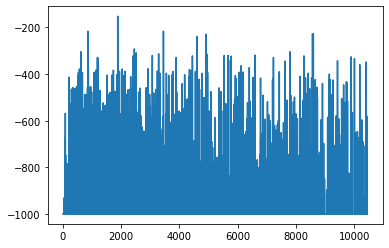

In [29]:
%matplotlib inline
plt.plot(episode_reward_lst)
plt.show()